In [13]:
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go
pi = np.pi
sin = np.sin
cos = np.cos
log = np.log

In [3]:
def GLCG(x0):
    a,b,m = 625,6571,31104
    while True:
        x0 = (a*x0+b)%m
        yield x0/m

glcg = GLCG(69)

def U(a,b):
    return a+(b-a)*next(glcg)

In [20]:
def box_muller(mu=0,sigma=1): #boxmuller
    epsilon = 1e-6 # prevent divison by zero
    U1, U2 = U(0,1), U(0,1)
    R = (-2*log(U1+epsilon))**0.5
    theta = 2*pi*U2
    return mu+sigma*R*cos(theta), mu+sigma*R*sin(theta)

## Task 1

$$\Sigma=\begin{pmatrix}9&6a\\6a&4\end{pmatrix}=\begin{pmatrix}\sigma_1^2&\sigma_1\sigma_2\rho\\\sigma_1\sigma_2\rho&\sigma_2^2\end{pmatrix}$$

Which gives $\sigma_1=3, \sigma_2=2, \rho=a$

From formula in lecture 5 we have
$$X = (X1,X2) = (\mu_1+\sigma_1Z_1,\mu_2+\rho\sigma_2Z_1+\sqrt{1-\rho^2}\sigma_2Z_2)$$

Where $Z_1,Z_2$ are iid $N(0,1)$

In [70]:
mu1, mu2 = 5,8
s1, s2 = 3,2
a = ... # Shush, linter.
# Actual density function of bivariate normal
def f(x,y):
    eps = 1e-6
    # Formula noted from mathworld.wolfram.com/BivariateNormalDistribution.html
    z = (x-mu1)**2/s1**2 - 2*a*(x-mu1)*(y-mu2)/s1/s2 + ((y-mu2)**2/s2**2)
    ans = np.exp(-z/2/(1-a*a+eps))/(2*pi*s1*s2*(1-a*a+eps)**0.5)
    return ans

In [71]:
f(x,y)

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [4.80873028e-105, 1.04539875e-045, 1.82334272e-010, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [9.73328108e-026, 4.29505507e-002, 1.52059297e-002, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [2.65258238e+001, 2.37594436e-011, 1.70741236e-047, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

Using a = -1


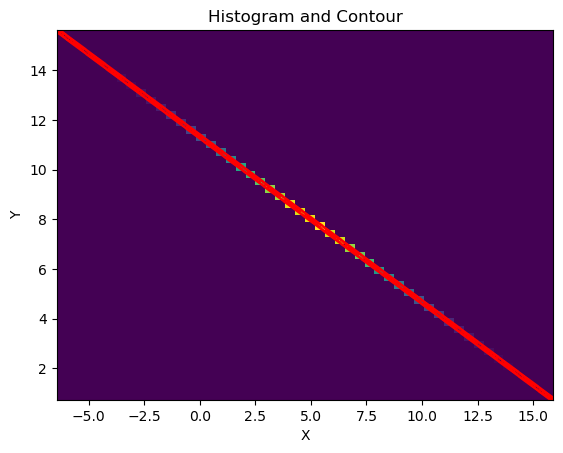

Using a = -0.5


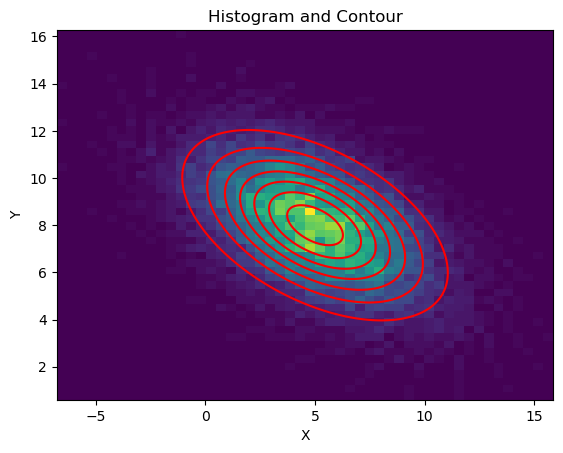

Using a = 0


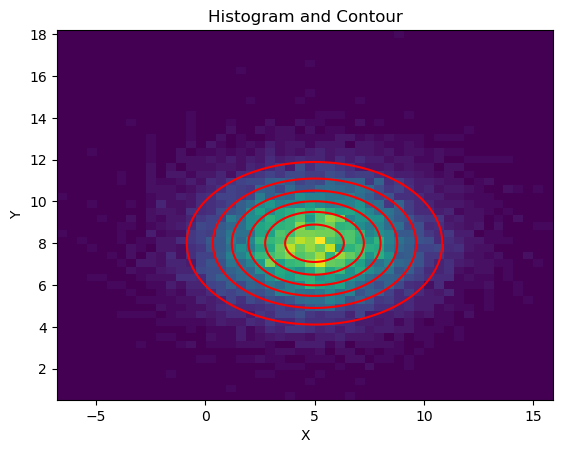

Using a = 0.5


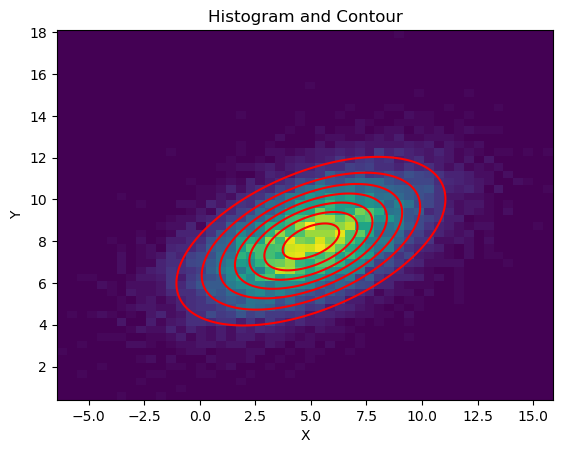

Using a = 1


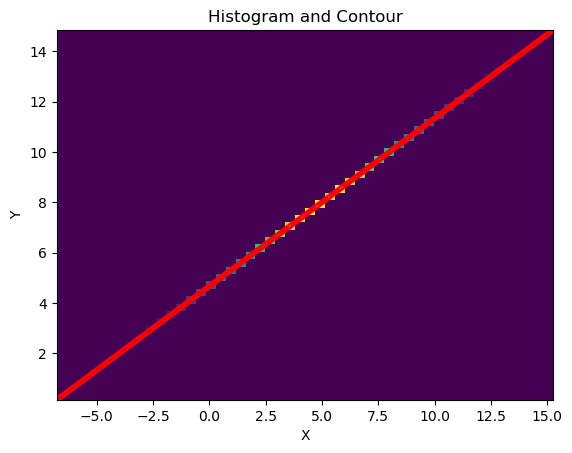

In [77]:
for a in (-1,-0.5,0,0.5,1):
    print("Using a =",a)
    X1, X2 = [], []
    
    # TASK A
    for i in range(10**4):
        Z1,Z2 = box_muller(0,1)
        X1 += [ mu1+s1*Z1 ]
        X2 += [ mu2+a*s2*Z1+(1-a*a)**0.5*s2*Z2 ]
    
    # TASK B
    plt.hist2d(x=X1,y=X2,bins=50)
    
    # TASK C
    x = np.linspace(min(X1),max(X1),1000)
    y = np.linspace(min(X1),max(X2),1000)
    x,y = np.meshgrid(x,y)
    
    plt.contour(x,y,f(x,y), colors="red") 

    plt.title('Histogram and Contour') 
    plt.xlabel('X')
    plt.ylabel('Y') 

    plt.show() 